In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import networkx as nx
import nx_altair as nxa
g = nx.Graph()


[Python Interactive Network Visualization Using NetworkX, Plotly, and Dash](https://towardsdatascience.com/python-interactive-network-visualization-using-networkx-plotly-and-dash-e44749161ed7)

NetworkX graph is exported to GEXF format, 标准文件，所以可以使用其他来可视化：  Gephi

grave 在命令行下弹出

https://docs.bokeh.org/en/latest/docs/user_guide/graph.html

http://holoviews.org/index.html

In [3]:
from fabfile import get_all_links

In [4]:
all_links = get_all_links()

In [5]:
all_links

{'readme.md': ['20200223_2136-Zettelkasten笔记原则.md',
  '20200223_2134-Zettelkasten是绝佳的笔记系统.md',
  '20200223_2136-Zettelkasten笔记原则.md'],
 '20200223_2134-Zettelkasten是绝佳的笔记系统.md': ['20200223_2136-Zettelkasten笔记原则.md'],
 '20200223_2136-Zettelkasten笔记原则.md': []}

In [6]:
dg = nx.DiGraph()

In [7]:
'''dg.add_edges_from([
    ('Variable', 'Select'),
    ('Select', 'GroupBy'),
    ('GroupBy', 'Mean'),
    ('Mean', 'Which1'),
    ('Mean', 'Which2'),
    ('Which1', 'Decimal1'),
    ('Which2', 'Decimal2'),
    ('Decimal1', 'Add'),
    ('Decimal2', 'Add'),
])
'''
node_edge_tuples = []
for i in all_links:
    for j in all_links[i]:
        node_edge_tuples.append((i,j))

In [8]:
node_edge_tuples

[('readme.md', '20200223_2136-Zettelkasten笔记原则.md'),
 ('readme.md', '20200223_2134-Zettelkasten是绝佳的笔记系统.md'),
 ('readme.md', '20200223_2136-Zettelkasten笔记原则.md'),
 ('20200223_2134-Zettelkasten是绝佳的笔记系统.md',
  '20200223_2136-Zettelkasten笔记原则.md')]

In [9]:
dg.add_edges_from(node_edge_tuples)

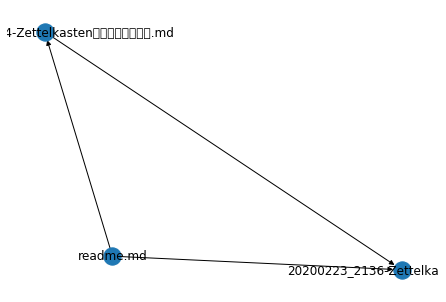

In [10]:
nx.draw(dg, with_labels=True)

In [13]:
pos = nx.spring_layout(dg)
for n in dg.nodes:
    dg.nodes[n]['name'] = n # type(n) -> str
nxa.draw_networkx( 
    G=dg,
    pos=pos,
    node_tooltip=['name'] # 无效
) # .interactive() tip会失效

alt.LayerChart(...)

In [21]:
# https://github.com/WestHealth/pyvis/blob/master/notebooks/example.ipynb
from pyvis.network import Network
g = Network(notebook=True) #,width=1400)
g.from_nx(dg)
g.show("example.html")